# Value Functions
- Breakdown on the creation of value functions for the VFT Modeling Tool

# Exponential Curve - Using Rho
- Monotonically Increasing  & Decreasing
- Inputs: Low, High, Rho, Increasing (T) or Decreasing (F)
- see Kirkwood, p65-66, 
- Equation  4.1: $F(t)=(1-e^{-(x-low)/rho})/(1-e^{-(high-low)/rho})$
- Equation 4.2: $F(t)=(1-e^{-(high-x)/rho})/(1-e^{-(high-low)/rho})$

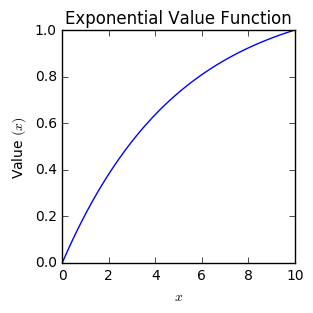

In [6]:
# Plot Exponential Function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

####################
# Input Values Here:
low = 0                        # important to keep inputs as a float
high = 10                    
rho = 5
increase = 'T'              # T-increasing function (or) F-decreasing function
# realistic values of rho will generally have a magnitude greater than one tenth of the range
# if the magnitude of rho is greater than 10 times the range than the function is almost a straight line
###################

increment = 100
x = np.linspace(low, high, increment)

# FOR INCREASING Exponential Curve:
if increase == 'T' :
    y = (1 - np.exp(-(x - low)/rho))/(1 - np.exp(-(high - low)/rho))

# FOR DECREASING Exponential Curve:    
else: 
    y = (1 - np.exp(-(high - x)/rho))/(1 - np.exp(-(high - low)/rho))

# Plot curve
plt.figure(figsize=(3,3))
plt.plot(x, y,'b-') 
plt.title('Exponential Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# Exponential Curve - Using Value Midpoint
- Monotonically Increasing  & Decreasing
- Inputs: Low, High and Value Midpoint (midvalue), INcreasing (T) or Decreasing (F)
- see Kirkwood, p67-69, 
- Equation  4.1: $F(t)=(1-e^{-(x-low)/rho})/(1-e^{-(high-low)/rho})$
- Equation 4.2: $F(t)=(1-e^{-(high-x)/rho})/(1-e^{-(high-low)/rho})$

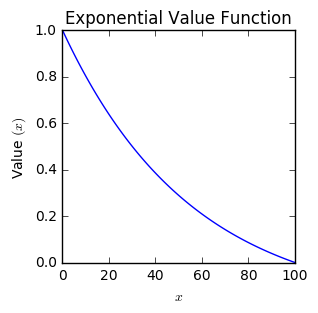

In [7]:
# Exponential Curve using value midpoint
# Using Kirkwood Text and guide for exponential curves
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#######################################################
# Input Values Here:
low = 0                     # least prefered             
mid = 30                    # value midpoint
high = 100                  # Most prefered
increase = 'F'              # T-increasing function (or) F-decreasing function

#######################################################
# Input Kirkwood Table 4.2: Calculating the Expontential Constant
Rtable = [0, 0.014, 0.029, 0.043, 0.058, 0.072, 0.087, 0.101, 0.115, 0.130, 
          0.144, 0.159, 0.174, 0.189, 0.204, 0.220, 0.236, 0.252, 0.269, 0.287, 
          0.305, 0.324, 0.344, 0.365, 0.387, 0.410, 0.435, 0.462, 0.491, 0.522,
          0.555, 0.592, 0.632, 0.677, 0.726, 0.782, 0.845, 0.917, 1.001, 1.099,
          1.216, 1.359, 1.536, 1.762, 2.063, 2.483, 3.112, 4.157, 6.243, 12.497,
          99999, -12.497, -6.243, -4.157, -3.112, -2.483, -2.063, -1.762, -1.536, -1.359,
          -1.216, -1.099, -1.001, -0.917, -0.845, -0.782, -0.726, -0.677, -0.632, -0.592,
          -0.555, -0.522, -0.491, -0.462, -0.435, -0.410, -0.387, -0.365, -0.344, -0.324,
          -0.305, -0.287, -0.269, -0.252, -0.236, -0.220, -0.204, -0.189, -0.174, -0.159,
          -0.144, -0.130, -0.115, -0.101, -0.087, -0.072, -0.058, -0.043, -0.029, -0.014]

#####################
# FOR INCREASING  Exponential Curve:
if increase == 'T' :

    z1 = (mid - low)/(high - low)         # normalized midvalue
    z100 = int(z1*100)                   # converting to index
    R1 = Rtable [z100]                   # lookup based on z1
    rho1 = R1 * (high - low)              # calculate rho1 based on R*range
    increment = 100
    x1 = np.linspace(low, high, increment)
    y1 = (1 - np.exp(-(x1 - low)/rho1))/(1 - np.exp(-(high - low)/rho1))
    
####################
# FOR DECREASING S-Curve:
else: 
    
    z1 = (mid - low)/(high - low)         # normalized midvalue
    z100 = int(z1*100)                   # converting to index
    R1 = Rtable [z100]                   # lookup based on z1
    rho1 = - R1 * (high - low)            # calculate rho1 based on R*range
    increment = 100
    x1 = np.linspace(low, high, increment)
    y1 = (1 - np.exp(-(high - x1)/rho1))/(1 - np.exp(-(high - low)/rho1))
    
####################
# Plot curve 
plt.figure(figsize=(3,3))
plt.plot(x1, y1,'b-') 
plt.title('Exponential Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# S Curve
- Using the Exponetial Functions for each of the two segments 
- Input Low, High, Midpoint, Midpoint Lower, Midpoint Higher, Increasing (T) or Decreasing (F)

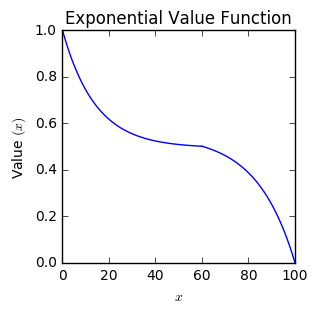

In [4]:

# S Curve 
# Using Kirkwood Text and guide for exponential curves
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#######################################################
# Input Values Here:
low = 0                     # least prefered             
mv1 = 10                    # front midpoint
mid = 60                    # overall midpoint
mv2 = 90                    # back midpoint
high = 100                  # Most prefered
increase = 'F'              # T-increasing function (or) F-decreasing function

#######################################################
# Input Kirkwood Table 4.2: Calculating the Expontential Constant
Rtable = [0, 0.014, 0.029, 0.043, 0.058, 0.072, 0.087, 0.101, 0.115, 0.130, 
          0.144, 0.159, 0.174, 0.189, 0.204, 0.220, 0.236, 0.252, 0.269, 0.287, 
          0.305, 0.324, 0.344, 0.365, 0.387, 0.410, 0.435, 0.462, 0.491, 0.522,
          0.555, 0.592, 0.632, 0.677, 0.726, 0.782, 0.845, 0.917, 1.001, 1.099,
          1.216, 1.359, 1.536, 1.762, 2.063, 2.483, 3.112, 4.157, 6.243, 12.497,
          99999, -12.497, -6.243, -4.157, -3.112, -2.483, -2.063, -1.762, -1.536, -1.359,
          -1.216, -1.099, -1.001, -0.917, -0.845, -0.782, -0.726, -0.677, -0.632, -0.592,
          -0.555, -0.522, -0.491, -0.462, -0.435, -0.410, -0.387, -0.365, -0.344, -0.324,
          -0.305, -0.287, -0.269, -0.252, -0.236, -0.220, -0.204, -0.189, -0.174, -0.159,
          -0.144, -0.130, -0.115, -0.101, -0.087, -0.072, -0.058, -0.043, -0.029, -0.014]

#####################
# FOR INCREASING S-Curve:
if increase == 'T' :

    # First half of S curve 
    z1 = (mv1 - low)/(mid - low)         # normalized midvalue
    z100 = int(z1*100)                   # converting to index
    R1 = Rtable [z100]                   # lookup based on z1
    rho1 = R1 * (mid - low)              # calculate rho1 based on R*range
    increment = 100
    x1 = np.linspace(low, mid, increment)
    y1 = (1 - np.exp(-(x1 - low)/rho1))/(1 - np.exp(-(mid - low)/rho1))/2
    
    # Second half of S curve 
    z2 = (mv2 - mid)/(high - mid)        # normalized midvalue
    z200 = int(z2*100)                   # converting to index
    R2 = Rtable [z200]                   # lookup based on z2
    rho2 = R2 * (high - mid)             # calculate rho2 ased on R*range
    x2 = np.linspace(mid, high, increment)
    y2 = (1 - np.exp(-(x2 - mid)/rho2))/(1 - np.exp(-(high - mid)/rho2))/2 + 0.5
    
####################
# FOR DECREASING S-Curve:
else: 
    
    # First half of S curve 
    z1 = (mv1 - low)/(mid - low)         # normalized midvalue
    z100 = int(z1*100)                   # converting to index
    R1 = Rtable [z100]                   # lookup based on z1
    rho1 = - R1 * (mid - low)            # calculate rho1 based on R*range
    increment = 100
    x1 = np.linspace(low, mid, increment)
    y1 = (1 - np.exp(-(mid - x1)/rho1))/(1 - np.exp(-(mid - low)/rho1))/2 + 0.5
    
    # Second half of S curve 
    z2 = (mv2 - mid)/(high - mid)        # normalized midvalue
    z200 = int(z2*100)                   # converting to index
    R2 = Rtable [z200]                   # lookup based on z2
    rho2 = - R2 * (high - mid)           # calculate rho2 ased on R*range
    x2 = np.linspace(mid, high, increment)
    y2 = (1 - np.exp(-(high-x2)/rho2))/(1 - np.exp(-(high - mid)/rho2))/2 

####################
# Plot curve 
plt.figure(figsize=(3,3))
plt.plot(x1, y1,'b-') 
plt.plot(x2, y2,'b-') 
plt.title('Exponential Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# Piecewise Linear Function
- Enter Midpoint (x,y) coordinate
- Enter Endpoint (x) coordinate

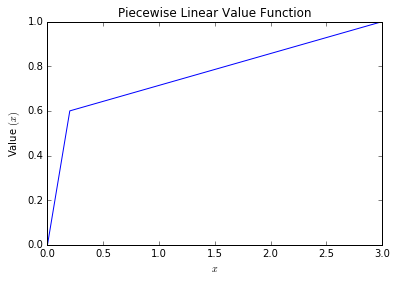

In [62]:
# Plot Piecewise Linear Function
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

# Origin
x1 = 0
y1 = 0

####################
# Input Coordinates:
x2 = .2      # Midpoint x coordinate
y2 = .6      # Midpoint y coordinate
x3 = 3       # Endpoint x coordinate
###################

y3 = 1

plt.plot([x1,x2,x3],[y1,y2,y3],'b-')
plt.title('Piecewise Linear Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# Curve Fitting
- Input coordinates and use polynomial fit

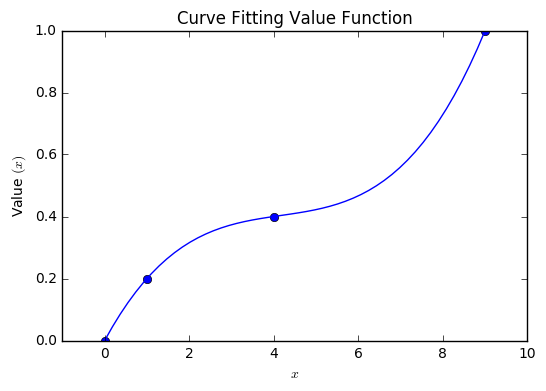

In [10]:
import numpy as np
import matplotlib.pyplot as plt

####################
# Input Coordinates:
points = np.array([(0, 0), (1, .2), (4, .4), (9, 1)])
####################

# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new,'b-')
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.title('Curve Fitting Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# Non Linear Least Squares Fit for Exponential 

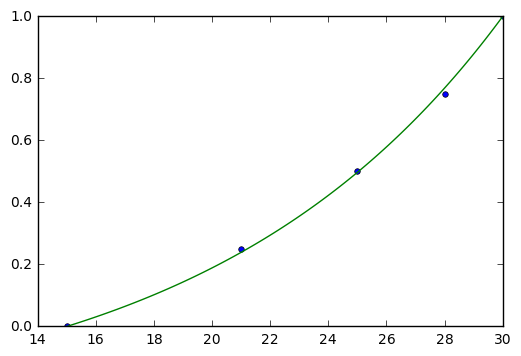

In [4]:
# https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.curve_fit.html
# Use non-linear least squares to fit a function, f, to data.

%matplotlib inline

import numpy as np
import scipy.optimize as optimization
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func(x, gamma):
    return (1-np.exp(-gamma*(x-xlow)))/(1-np.exp(-gamma*(xhigh-xlow)))

# Input Inital Metrics 
xlow = 15.0
x2 = 21.0
xmid = 25.0
x4 = 28.0
xhigh = 30.0

# Create Intital Data Array
xdata = np.array([xlow, x2, xmid, x4, xhigh])
ydata = np.linspace(0, 1, 5)

# Starting Guess for Gamma Parameter
gamma0 = 0.1

# Use non-linear least squares to fit a function to data.
optcalc = optimization.curve_fit(func, xdata, ydata, gamma0)
# Grab Optimal Value for Gamma 
gammaBest = optcalc[0]
    
plt.plot(xdata, ydata, 'o', markersize=4, label='data')
xline = np.linspace(xlow, xhigh, 100)
fitdata = func(xline, gammaBest)  
plt.plot(xline, fitdata)
plt.show()

# S Curve
- Using the Sigmoid Function:  $ S(t) = 1/(1-e^{-t})$
- Input Low, High and Flip

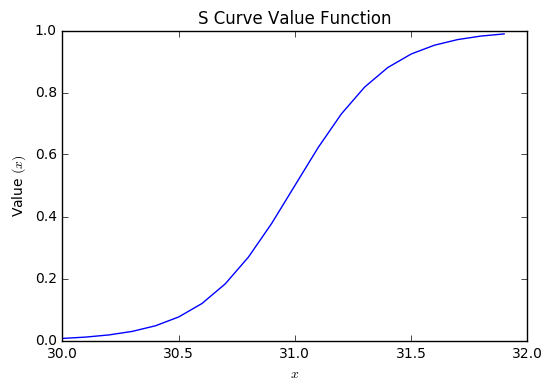

In [3]:
# Plot Sigmoid Function
# The logistic function looks like an elongated S
# Also consider generalised logistic function 

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

####################
# Input Values Here:
low = 30 
scale = 2
flip = 0                    # Flip = 1 to reverse curve
###################


# Define the Sigmoid Function
def sigmoid(t):                         
    return (1/(1 + np.e**(-t))) 

plot_range = np.arange(-5, 5, 0.5) #evenly spaced values within a  interval: [start, stop), interval
y_values = sigmoid(plot_range)

# Plot curve
if flip == 0:
    plt.plot((plot_range*scale/10)+(.5*scale)+low, y_values, color="blue")
else:
    plt.plot((plot_range*scale/10)+(.5*scale)+low, 1-y_values, color="red")

plt.title('S Curve Value Function')
plt.xlabel('$x$')
plt.ylabel('Value $(x)$')
plt.show()

# new_plot_range = ((plot_range*scale/10)+(.5*scale)+low)   # new plot range
# old_plot_range = (10*(new_plot_range -(.5*scale)-low))/scale      # old plot range